In [24]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [28]:
# Download the dataset
!kaggle datasets download -d carrie1/ecommerce-data

# Unzip the downloaded file
!unzip ecommerce-data.zip

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data.csv', encoding='unicode_escape') #Specify encoding if necessary

# Now you can work with the DataFrame 'df'
print(df.head())


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open ecommerce-data.zip, ecommerce-data.zip.zip or ecommerce-data.zip.ZIP.
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE ME

In [30]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [40]:
#Atributos de las columnas
print("Datos originales:\n", df.columns.tolist())

# 2. Verificar tipos de datos
print("\nTipos de datos originales:\n", df.dtypes)

# 3. Identificar valores nulos
null_counts = df.isnull().sum()
print("\nCantidad de nulos por columna:\n", null_counts)


Datos originales:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Month']

Tipos de datos originales:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Month                   int32
dtype: object

Cantidad de nulos por columna:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
dtype: int64


,0
InvoiceNo,0.0
StockCode,0.0
Description,0.0
Quantity,0.0
InvoiceDate,0.0
UnitPrice,0.0
CustomerID,0.0
Country,0.0
Month,0.0


In [43]:
# 1. Ticket promedio por transacción
df['Total_Transaction'] = df['Quantity'] * df['UnitPrice']
ticket_promedio = df.groupby('InvoiceNo')['Total_Transaction'].sum().mean()
print(f"\nTicket promedio por transacción: £{ticket_promedio:.2f}")

# 2. Productos más vendidos (top 10)
top_productos = df['Description'].value_counts().head(10)
print("\nTop 10 productos más vendidos:")
print(top_productos)

# 3. Ventas por país (top 5)
ventas_por_pais = df.groupby('Country')['Total_Transaction'].sum().sort_values(ascending=False).head(5)
print("\nVentas totales por país (Top 5):")
print(ventas_por_pais)


Ticket promedio por transacción: £376.36

Top 10 productos más vendidos:
Description
WHITE HANGING HEART T-LIGHT HOLDER    3823
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

Ventas totales por país (Top 5):
Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: Total_Transaction, dtype: float64


In [44]:
# Sacar "tickets"
df['Total_Item'] = df['Quantity'] * df['UnitPrice']
ticket_por_compra = df.groupby('InvoiceNo')['Total_Item'].sum()
ticket_promedio = ticket_por_compra.mean()
print(f"Ticket promedio: £{ticket_promedio:.2f}")

Ticket promedio: £376.36


<ipython-input-52-e63c0ff9fd2d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ticket_pais, x='Country', y='Total_Item', palette='viridis')


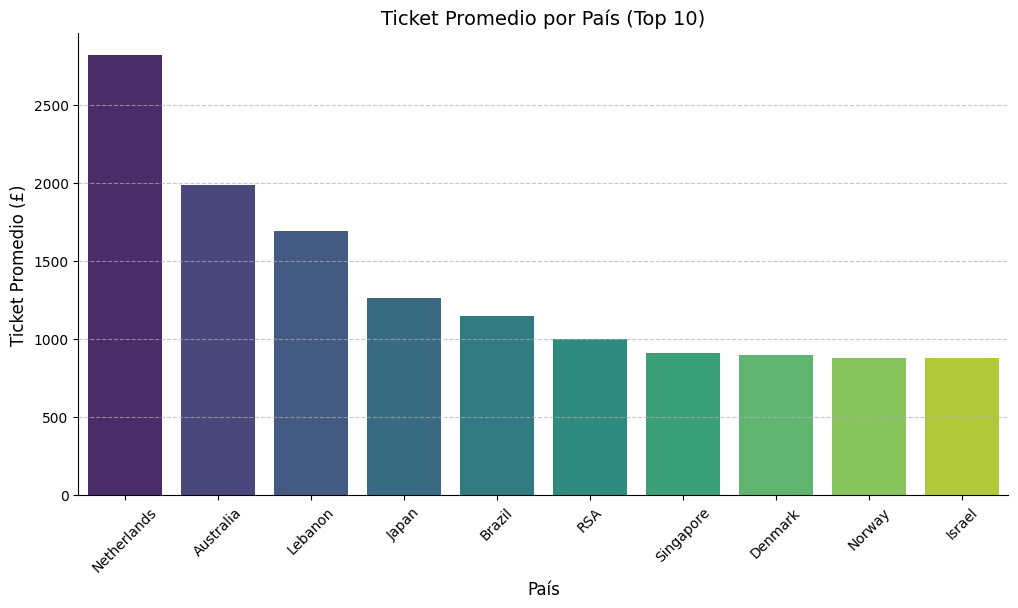

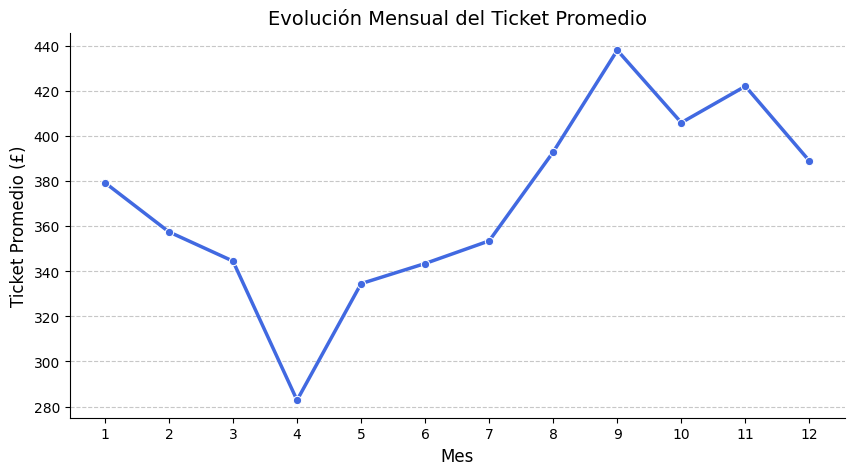

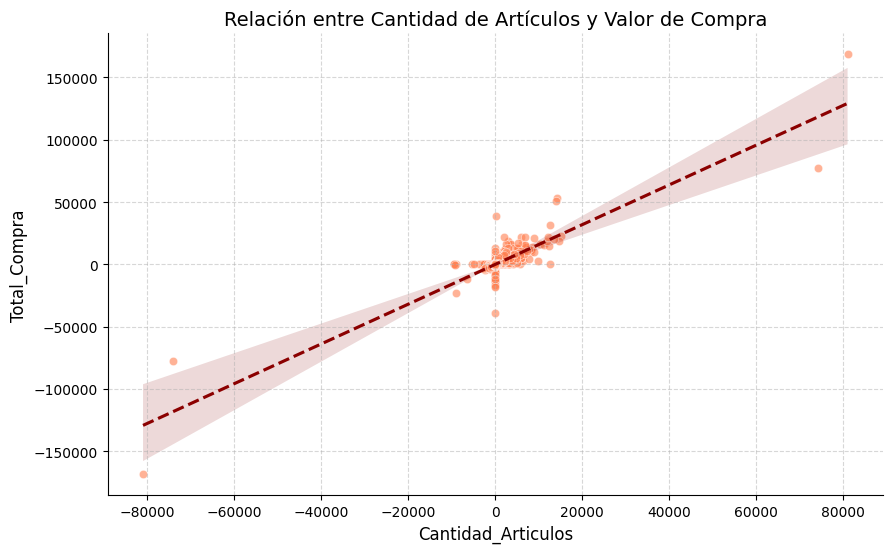

In [52]:
# Ticket por país

# Preparamos los datos
ticket_pais = df.groupby(['InvoiceNo','Country'])['Total_Item'].sum().groupby('Country').mean().sort_values(ascending=False).head(10).reset_index()

# Configuramos el gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=ticket_pais, x='Country', y='Total_Item', palette='viridis')
plt.title('Ticket Promedio por País (Top 10)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Ticket Promedio (£)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

# Ticket promeio por mes
ticket_mes = df.groupby(['InvoiceNo','Mes'])['Total_Item'].sum().groupby('Mes').mean().reset_index()

# Configuramos el gráfico
plt.figure(figsize=(10,5))
sns.lineplot(data=ticket_mes, x='Mes', y='Total_Item', marker='o', color='royalblue', linewidth=2.5)
plt.title('Evolución Mensual del Ticket Promedio', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ticket Promedio (£)', fontsize=12)
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


# Relacion entre ticket y cantidad de articulos
plt.figure(figsize=(10,6))
sns.scatterplot(data=transacciones, x='Cantidad_Articulos', y='Total_Compra', alpha=0.6, color='coral')
plt.title('Relación entre Cantidad de Artículos y Valor de Compra', fontsize=14)
plt.xlabel('Cantidad de Artículos', fontsize=12)
plt.ylabel('Total de Compra (£)', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)

# Añadimos línea de tendencia
sns.regplot(data=transacciones, x='Cantidad_Articulos', y='Total_Compra',
            scatter=False, color='darkred', line_kws={'linestyle':'--'})
sns.despine()
plt.show()